In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dir = Path("_data/2021-05-08")
train_dfs = list(train_dir.glob("*test.parquet"))
print(train_dfs)
out_dfs = []
for k, train_df in enumerate(train_dfs):
    out_df = pd.read_parquet(train_df)
    out_dfs.append(out_df)
out_df = pd.concat(out_dfs)

[PosixPath('_data/2021-05-08/0-test.parquet'), PosixPath('_data/2021-05-08/1-test.parquet'), PosixPath('_data/2021-05-08/2-test.parquet'), PosixPath('_data/2021-05-08/3-test.parquet')]


In [ ]:
print(out_df)

In [4]:
out_df = out_df.iloc[1:]

In [6]:
out_df.dtypes

epoch_time                             float64
initial_batch_size                       int64
max_batch_size                           int64
batch_growth_rate                      float64
dampingfactor                          float64
dampingdelay                             int64
epochs                                 float64
verbose                                   bool
lr                                     float64
no_cuda                                   bool
random_state                             int64
init_seed                                int64
damper                                  object
dataset                                 object
approx_loss                               bool
test_freq                                int64
rho                                    float64
dwell                                    int64
approx_rate                               bool
nesterov                                 int64
momentum                               float64
weight_decay 

In [7]:
out_df.describe()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,lr,random_state,init_seed,...,time,step_time,lr_,batch_size_,opt_param_lr_decay,opt_param_eps,opt_param_initial_accumulator_value,_moving_avg,_batch_grad_norm2,_initial_factor
count,8.030000e+02,803.000000,803.000000,8.030000e+02,803.0,803.000000,803.000000,803.000000,803.0,803.0,...,8.000000e+02,800.000000,8.000000e+02,800.00000,201.0,2.010000e+02,201.0,200.000000,200.000000,2.000000e+02
mean,1.620465e+09,112.059776,17085.170610,1.000000e-02,5.0,5.499377,100.231333,0.014446,1000.0,1000.0,...,1.620465e+09,0.222500,2.025170e-03,2053.84000,0.0,1.000000e-10,0.0,7.342871,7.394901,1.482642e+08
std,7.456765e+03,83.224759,24867.406661,3.471609e-18,0.0,0.500311,58.049692,0.005096,0.0,0.0,...,7.429304e+03,0.169368,3.641108e-03,1962.86938,0.0,1.295697e-26,0.0,0.773464,3.602408,2.987711e-08
min,1.620452e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,0.000000,0.005633,1000.0,1000.0,...,1.620452e+09,0.115287,1.493686e-25,64.00000,0.0,1.000000e-10,0.0,5.762440,1.512043,1.482642e+08
25%,1.620458e+09,64.000000,4096.000000,1.000000e-02,5.0,5.000000,50.026667,0.011511,1000.0,1000.0,...,1.620459e+09,0.120224,5.697958e-13,64.00000,0.0,1.000000e-10,0.0,6.827305,5.083170,1.482642e+08
50%,1.620465e+09,64.000000,4096.000000,1.000000e-02,5.0,5.000000,100.053333,0.017389,1000.0,1000.0,...,1.620465e+09,0.126956,5.513502e-08,256.00000,0.0,1.000000e-10,0.0,7.284881,6.483525,1.482642e+08
75%,1.620471e+09,160.000000,32048.000000,1.000000e-02,5.0,6.000000,150.240000,0.017389,1000.0,1000.0,...,1.620471e+09,0.243365,5.632876e-03,4096.00000,0.0,1.000000e-10,0.0,7.770500,9.246009,1.482642e+08
max,1.620478e+09,256.000000,60000.000000,1.000000e-02,5.0,6.000000,200.533333,0.017389,1000.0,1000.0,...,1.620478e+09,0.626023,1.738879e-02,4096.00000,0.0,1.000000e-10,0.0,9.841505,25.958284,1.482642e+08


In [8]:
df = out_df

In [ ]:
fig, ax = plt.subplots()
# ax.set_yscale("log", basey=2)
# ax.set_xlim(0, 0.2e7)

for i in out_dfs:
    print(i.damper.unique())
    
# out_dfs[0].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[1].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
out_dfs[2].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[3].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)

In [13]:
out_df.damper.unique()

array(['geodamplr', 'geodamp', 'adagrad', 'radadamp'], dtype=object)

<ipython-input-17-a7d96a2d5a19>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


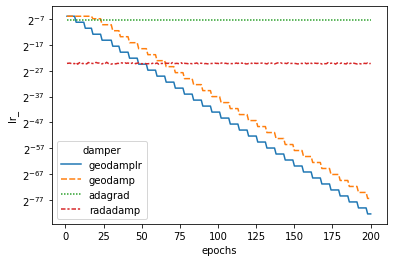

In [17]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

<ipython-input-18-a085ad6f5759>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


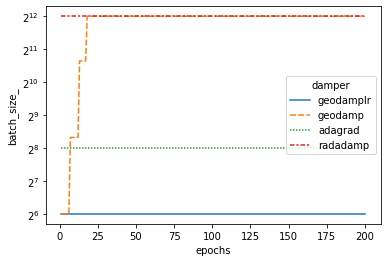

In [18]:
ax = sns.lineplot(x="epochs", y="batch_size_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

<ipython-input-19-15775f634f23>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


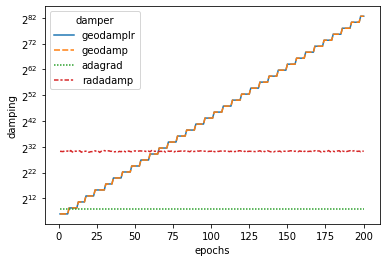

In [19]:
ax = sns.lineplot(x="epochs", y="damping", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

<ipython-input-20-100438c539f1>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 25.0)

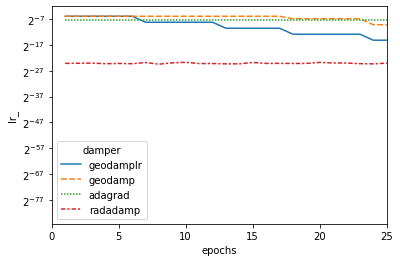

In [20]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 25)

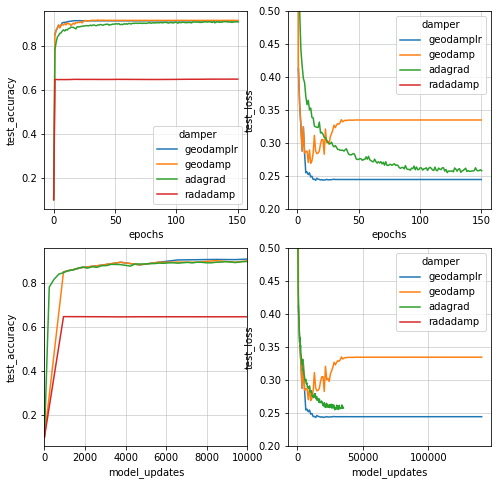

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="damper",
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
        if "acc" in y and "updates" in x:
            ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "acc" in y and "model" in x:
            ax.legend_.remove()